# Busca Exaustiva

Esta etapa do projeto utilizou a estratégia de Busca Exaustiva, em que uma solução ótima de um problema é encontrada, por meio da geração de todas as soluções possíveis.

Sendo uma entrada composta por duas sequências de DNA (A e B), o código implementado funciona por meio das seguintes etapas:

1. Geração de todas as subsequências de A e de B
2. Cálculo dos alinhamentos de cada par de subsequencias de A e de B (com os pesos wmat, wmis e wgap). Foram utilizadas as seguintes estratégias para o cálculo:

    2.1. Alinhamento pelo método de Smith Waterman

    2.2. Score simples, por meio de uma comparação direta entre as duas subsequências, sendo a maior truncada para que ambas possuam o mesmo tamanho
    
    2.3. Uma mistura das duas estratégias descritas acima, sendo o score simples utilizado no cálculo de quando as sequências possuem o mesmo tamanho e o método de Smith Waterman, caso contrário.

3. A saída do programa será composta do score de alinhamento, além das subsequências correspondentes alinhadas.

## Comparação dos desempenhos

In [36]:
import subprocess
import time
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
def roda_com_entrada(executavel, arquivo_in):
    with open(f"in/{arquivo_in}") as f:
        start = time.perf_counter()
        proc = subprocess.run([f"./exe/{executavel}"], input=f.read(), text=True, capture_output=True)
        end = time.perf_counter()
        
        return(proc.stdout, (end - start))

In [38]:
executaveis = ["busca_exaustiva","busca_exaustiva_score_simples","busca_exaustiva_smith_waterman"]
arquivos=[]
for i in range(10):
    arquivos.append(f"dna{i}.seq")

In [39]:
dic={}
for executavel in executaveis:
    print(executavel)
    dic[executavel] = {
        "results": None,
        "times" : None
    }
    results=[]
    times=[]
    for arquivo_in in arquivos:
        print(arquivo_in)
        
        desempenho = roda_com_entrada(executavel, arquivo_in)
        results.append(desempenho[0])
        times.append(desempenho[1])

    dic[executavel]["results"] = results
    dic[executavel]["times"] = times


busca_exaustiva
dna0.seq
dna1.seq
dna2.seq
dna3.seq
dna4.seq
dna5.seq
dna6.seq
dna7.seq
dna8.seq
dna9.seq
busca_exaustiva_score_simples
dna0.seq
dna1.seq
dna2.seq
dna3.seq
dna4.seq
dna5.seq
dna6.seq
dna7.seq
dna8.seq
dna9.seq
busca_exaustiva_smith_waterman
dna0.seq
dna1.seq
dna2.seq
dna3.seq
dna4.seq
dna5.seq
dna6.seq
dna7.seq
dna8.seq
dna9.seq


In [40]:
df = pd.DataFrame(dic)
df

,busca_exaustiva,busca_exaustiva_score_simples,busca_exaustiva_smith_waterman
results,"[0, 6, 13, 18, 28, 27, 35, 43, 42, 56]","[0, 5, 7, 11, 16, 16, 13, 15, 13, 12]","[0, 6, 13, 18, 28, 27, 35, 43, 42, 56]"
times,"[0.006087206000302103, 0.00836404500023491, 0....","[0.0043600520002655685, 0.00454135000018141, 0...","[0.004189940999822284, 0.005805716999930155, 0..."


In [45]:
# https://www.geeksforgeeks.org/nested-dictionary-to-multiindex-dataframe/
reformed_dict = {}
for outerKey, innerDict in dic.items():
    for innerKey, values in innerDict.items():
        reformed_dict[(outerKey,
                       innerKey)] = values
        
multiIndex_df = pd.DataFrame(reformed_dict)
multiIndex_df

busca_exaustiva             busca_exaustiva_score_simples             \
          results       times                       results      times   
0               0    0.006087                             0   0.004360   
1               6    0.008364                             5   0.004541   
2              13    0.069038                             7   0.015711   
3              18    0.498826                            11   0.072276   
4              28    2.359014                            16   0.246512   
5              27    8.136351                            16   0.823848   
6              35   23.681985                            13   2.291528   
7              43   57.916238                            15   3.551747   
8              42  130.894090                            13   6.874170   
9              56  277.301057                            12  12.698820   

  busca_exaustiva_smith_waterman              
                         results       times  
0                              0    0.004190  
1                              6    0.005806  
2                             13    0.066766  
3                             18    0.551461  
4                             28    2.573910  
5                             27    9.485781  
6                             35   26.213335  
7                             43   65.512087  
8                             42  134.762550  
9                             56  277.103201

In [54]:
valores=[1]
for i in range (1,10):
    valores.append(valores[i-1]+10)


## Comparação de tempo

Text(0.5, 1.0, 'Gráfico do tempo em função do tamanho da sequência\n')

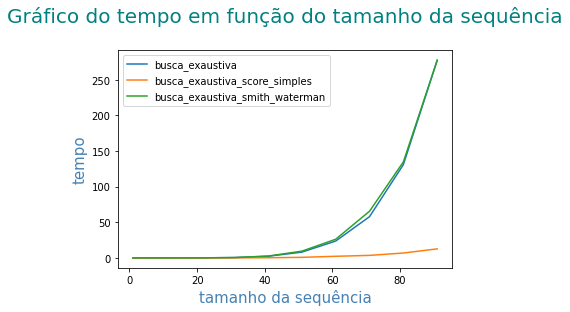

In [66]:
for exe in df.columns.values.tolist():
    plt.plot(valores,multiIndex_df[exe]["times"].values, label=exe)
plt.legend()
plt.xlabel("tamanho da sequência", 
           fontsize=15,
          color="steelblue")
plt.ylabel("tempo", 
           fontsize=15,
          color="steelblue")
plt.title(label="Gráfico do tempo em função do tamanho da sequência\n",
          fontsize=20,
          color="teal")

## Comparação de valores

Text(0.5, 1.0, 'Gráfico do valor máximo encontrado em função do tamanho da sequência\n')

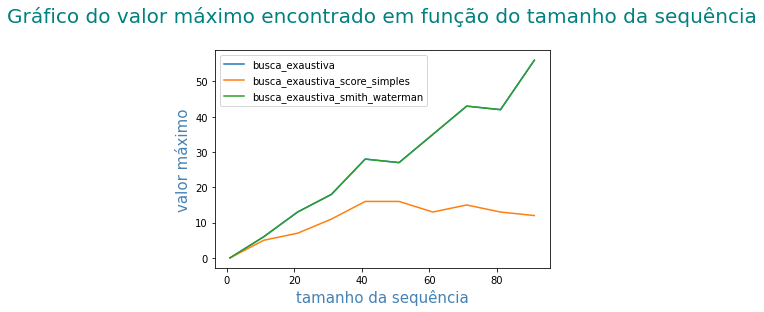

In [64]:
for exe in df.columns.values.tolist():
    plt.plot(valores,multiIndex_df[exe]["results"].values.astype(float), label=exe)
plt.legend()
plt.xlabel("tamanho da sequência", 
           fontsize=15,
          color="steelblue")
plt.ylabel("valor máximo", 
           fontsize=15,
          color="steelblue")
plt.title(label="Gráfico do valor máximo encontrado em função do tamanho da sequência\n",
          fontsize=20,
          color="teal")

## Conclusões

O gráfico do tempo em função do tamanho da sequência mostrou que o desempenho da busca exaustiva com o alinhamento calculado pelo método de Smith Waterman (em verde) teve um desempenho muito similar em termos de velocidade ao método que mesclava Smith Waterman com o cálculo de score simples (em azul). Ambos aparentam possuir complexidade O(n²), apresentando uma curva exponencial

Este resultado condiz com o esperado, pois ao gerar todas as subsequências possíveis e calcular seus respectivos scores, na maior parte das comparações o tamanho entre as sequências será diferente, de forma que na realidade a maior parte dos cálculos se dará pelo próprio método de Smith Waterman. 

Por precisar montar uma matriz e calcular o score em cada posição com dependência dos valores das posições vizinhas, este método é de fato mais demorado. Além disso, ele inclui a reconstrução do alinhamento das sequências, em que um caminho dentro da matriz deve ser percorrido novamente. O processo como um todo é bem mais complexo do que uma comparação simples, feita a partir de uma mesma posição em duas sequências distintas, o que consequentemente eleva significativamente o tempo de processamento.

Além disso, é possível observar que existe um limiar em torno do tamanho da sequência igual a 40, a partir do qual o tempo de processamento dos programas com o uso do método de Smith Waterman cresce mais.

Ou seja, a partir de tal limiar, a utilização de tais métodos pode apresentar desvantagens em relação ao tempo de processamento, sendo que quanto maior o tamanho da sequência, pior será o desempenho.

Contudo, estes métodos apresentaram vantagens em relação ao desempenho, como mostra o gráfico do valor máximo encontrado em função do tamanho da sequência.

Para tamanhos de sequência menores (cerca de abaixo de 10), os resultados do alinhamento calculado por Smith Waterman e pelo método de alinhamento simples não diferiram significativamente. Porém, conforme o tamanho da sequência aumenta, o gráfico mostra que o cálculo por score simples possui um desempenho nitidamente inferior. Isso se dá pelo fato deste método não considerar os gaps no alinhamento, conforme é calculado no método de Smith Waterman.